## Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Load Data and 1st plot

#### load data

In [245]:
dataset1 = pd.read_excel('/Users/konstantinoskazanas/Downloads/DATA SCIENCE/CASE_STUDY/Case Study Dataset/Case Study_dataset 1.xlsx')
dataset2 = pd.read_excel('/Users/konstantinoskazanas/Downloads/DATA SCIENCE/CASE_STUDY/Case Study Dataset/Case Study_dataset 2.xlsx')

In [246]:
dataset1.head()

,Nr,DateOfObservation,Loan_ID,Client_ID,DefaultFlag,PropertyType,PropertyValue,PropertySize,ExposureLoanToValue,TotalCustomerLoanToValue,...,30_60DelinquencyLast3Mon,30_60DelinquencyLast12Mon,60_90DelinquencyLast3Mon,60_90DelinquencyLast12Mon,DaysInDelinquency,DateOfLastDefaultFlag,Technical_field_1,Technical_field_2,Technical_field_3,Technical_field_4
0,1,2017-12-31,427253,850300,0,Double-family house,1650000,175.1,0.005,0.377,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,2,2017-12-31,307445,683049,0,Apartment,1367857,136.2,0.000,1.203,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,3,2017-06-30,859307,831240,0,Apartment,1210715,83.4,1.152,1.152,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,4,2017-06-30,323448,945249,0,Apartment,2150000,160.6,0.016,0.026,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,5,2017-07-31,875791,710975,0,Apartment,1867857,105.8,0.399,0.945,...,1,1,0,0,29,NaN,NaN,NaN,NaN,NaN


In [247]:
dataset2.head()

,Nr,DateOfObservation,Loan_ID,Client_ID,DefaultFlag,PropertyType,PropertyValue,PropertySize,ExposureLoanToValue,TotalCustomerLoanToValue,...,30_60DelinquencyLast3Mon,30_60DelinquencyLast12Mon,60_90DelinquencyLast3Mon,60_90DelinquencyLast12Mon,DaysInDelinquency,DateOfLastDefaultFlag,Technical_field_1,Technical_field_2,Technical_field_3,Technical_field_4
0,55869,2017-04-30,849066,203069,0,Townhouse,2157143,121.2,0.015,0.110,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
1,55870,2017-04-30,678575,913095,0,Apartment,2703572,165.2,0.174,1.036,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,55871,2017-04-30,493972,635246,0,Apartment,2678572,97.0,0.028,0.157,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,55872,2017-04-30,769271,333312,0,Apartment,1600000,98.6,0.111,0.615,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,55873,2017-04-30,435374,364567,0,Single-family house,4228572,212.9,0.072,0.072,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [248]:
print(dataset1.columns)

Index(['Nr', 'DateOfObservation', 'Loan_ID', 'Client_ID', 'DefaultFlag',
       'PropertyType', 'PropertyValue', 'PropertySize', 'ExposureLoanToValue',
       'TotalCustomerLoanToValue', 'CountryOfOrigination', 'City',
       'NumberOfExposures', 'CPI', 'ProductName', 'ExposureAmount',
       'RemainingPaymentsRatio', 'TimeToMaturity', 'MaturityRatio',
       'InterestRate', 'MonthsOnBook', 'ExposureDefaultFlagCount',
       'ClientDefaultFlagCount', 'DelinquencyFlag', 'DelinquencyLast3Mon',
       'DelinquencyLast12Mon', '30PlusDelinquencyLast3Mon',
       '30PlusDelinquencyLast12Mon', '60PlusDelinquencyLast3Mon',
       '60PlusDelinquencyLast12Mon', '0_30DelinquencyLast3Mon',
       '0_30DelinquencyLast12Mon', '30_60DelinquencyLast3Mon',
       '30_60DelinquencyLast12Mon', '60_90DelinquencyLast3Mon',
       '60_90DelinquencyLast12Mon', 'DaysInDelinquency',
       'DateOfLastDefaultFlag', 'Technical_field_1', 'Technical_field_2',
       'Technical_field_3', 'Technical_field_4'],
     

In [249]:
print(dataset2.columns)

Index(['Nr', 'DateOfObservation', 'Loan_ID', 'Client_ID', 'DefaultFlag',
       'PropertyType', 'PropertyValue', 'PropertySize', 'ExposureLoanToValue',
       'TotalCustomerLoanToValue', 'CountryOfOrigination', 'City',
       'NumberOfExposures', 'CPI', 'ProductName', 'ExposureAmount',
       'RemainingPaymentsRatio', 'TimeToMaturity', 'MaturityRatio',
       'InterestRate', 'MonthsOnBook', 'ExposureDefaultFlagCount',
       'ClientDefaultFlagCount', 'DelinquencyFlag', 'DelinquencyLast3Mon',
       'DelinquencyLast12Mon', '30PlusDelinquencyLast3Mon',
       '30PlusDelinquencyLast12Mon', '60PlusDelinquencyLast3Mon',
       '60PlusDelinquencyLast12Mon', '0_30DelinquencyLast3Mon',
       '0_30DelinquencyLast12Mon', '30_60DelinquencyLast3Mon',
       '30_60DelinquencyLast12Mon', '60_90DelinquencyLast3Mon',
       '60_90DelinquencyLast12Mon', 'DaysInDelinquency',
       'DateOfLastDefaultFlag', 'Technical_field_1', 'Technical_field_2',
       'Technical_field_3', 'Technical_field_4'],
     

In [250]:
ds=pd.concat([dataset1, dataset2], ignore_index=True)

In [251]:
ds.tail()

,Nr,DateOfObservation,Loan_ID,Client_ID,DefaultFlag,PropertyType,PropertyValue,PropertySize,ExposureLoanToValue,TotalCustomerLoanToValue,...,30_60DelinquencyLast3Mon,30_60DelinquencyLast12Mon,60_90DelinquencyLast3Mon,60_90DelinquencyLast12Mon,DaysInDelinquency,DateOfLastDefaultFlag,Technical_field_1,Technical_field_2,Technical_field_3,Technical_field_4
123676,123677,2016-04-30,864590,236287,0,Townhouse,2553571,158.0,0.101,0.216,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
123677,123678,2016-04-30,294105,156063,0,Apartment,1035714,76.8,0.542,1.162,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
123678,123679,2016-04-30,942781,976780,0,Apartment,1878571,123.5,0.141,0.299,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
123679,123680,2016-04-30,660921,863469,0,Apartment,1825000,133.3,0.243,0.243,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
123680,123681,2016-04-30,619081,734264,0,Single-family house,1014286,158.4,0.332,0.332,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [252]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123681 entries, 0 to 123680
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Nr                          123681 non-null  int64         
 1   DateOfObservation           123681 non-null  datetime64[ns]
 2   Loan_ID                     123681 non-null  int64         
 3   Client_ID                   123681 non-null  int64         
 4   DefaultFlag                 123681 non-null  int64         
 5   PropertyType                123058 non-null  object        
 6   PropertyValue               123681 non-null  int64         
 7   PropertySize                123681 non-null  float64       
 8   ExposureLoanToValue         123681 non-null  float64       
 9   TotalCustomerLoanToValue    123681 non-null  float64       
 10  CountryOfOrigination        123599 non-null  object        
 11  City                        123599 non-

In [253]:
ds_300 = ds[(ds["PropertySize"] > 300) & (ds["ProductName"] == 'General mortgages')]

In [254]:
ds_300.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3796 entries, 56 to 123622
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Nr                          3796 non-null   int64         
 1   DateOfObservation           3796 non-null   datetime64[ns]
 2   Loan_ID                     3796 non-null   int64         
 3   Client_ID                   3796 non-null   int64         
 4   DefaultFlag                 3796 non-null   int64         
 5   PropertyType                3792 non-null   object        
 6   PropertyValue               3796 non-null   int64         
 7   PropertySize                3796 non-null   float64       
 8   ExposureLoanToValue         3796 non-null   float64       
 9   TotalCustomerLoanToValue    3796 non-null   float64       
 10  CountryOfOrigination        3796 non-null   object        
 11  City                        3796 non-null   object        

In [255]:
print(ds_300["ExposureAmount"].sum())

1516426867


In [256]:
ds_3 = ds[(ds["NumberOfExposures"] == 3)]

In [257]:
ds_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20345 entries, 1 to 123678
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Nr                          20345 non-null  int64         
 1   DateOfObservation           20345 non-null  datetime64[ns]
 2   Loan_ID                     20345 non-null  int64         
 3   Client_ID                   20345 non-null  int64         
 4   DefaultFlag                 20345 non-null  int64         
 5   PropertyType                20269 non-null  object        
 6   PropertyValue               20345 non-null  int64         
 7   PropertySize                20345 non-null  float64       
 8   ExposureLoanToValue         20345 non-null  float64       
 9   TotalCustomerLoanToValue    20345 non-null  float64       
 10  CountryOfOrigination        20345 non-null  object        
 11  City                        20345 non-null  object        

In [258]:
print(ds_3["Client_ID"].value_counts())

Client_ID
681991    3
736964    3
714241    2
672255    2
636862    2
         ..
139311    1
999388    1
475446    1
776678    1
976780    1
Name: count, Length: 20106, dtype: int64


In [259]:
ds_3_in = ds[(ds["Client_ID"] == 681991) | (ds["Client_ID"] == 736964)]

In [260]:
ds_3_in.head(6)

,Nr,DateOfObservation,Loan_ID,Client_ID,DefaultFlag,PropertyType,PropertyValue,PropertySize,ExposureLoanToValue,TotalCustomerLoanToValue,...,30_60DelinquencyLast3Mon,30_60DelinquencyLast12Mon,60_90DelinquencyLast3Mon,60_90DelinquencyLast12Mon,DaysInDelinquency,DateOfLastDefaultFlag,Technical_field_1,Technical_field_2,Technical_field_3,Technical_field_4
10769,10770,2016-06-30,255775,736964,0,Apartment,1942857,140.5,0.446,0.666,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
20974,20975,2016-08-31,984987,736964,0,Single-family house,3600000,223.1,0.161,0.230,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
28962,28963,2016-10-31,821908,681991,0,Apartment,778572,110.0,0.248,1.062,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
41221,41222,2016-12-31,512606,681991,0,Single-family house,1396429,183.8,0.232,0.449,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
69940,69941,2016-09-30,745625,681991,0,Single-family house,4732143,308.4,0.038,0.201,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
74753,74754,2017-07-31,305024,736964,0,Single-family house,2075000,220.3,0.424,0.781,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [261]:
print(ds_3_in[["Client_ID", "ExposureAmount"]])

       Client_ID  ExposureAmount
10769     736964          866841
20974     736964          581219
28962     681991          193408
41221     681991          323404
69940     681991          180479
74753     736964          879250


In [262]:
ds_736964 = ds[(ds["Client_ID"] == 736964)]
print(ds_736964["ExposureAmount"].sum()) 

2327310


In [263]:
ds_681991 = ds[(ds["Client_ID"] == 681991)]
print(ds_681991["ExposureAmount"].sum()) 

697291


#### loans distribution by country

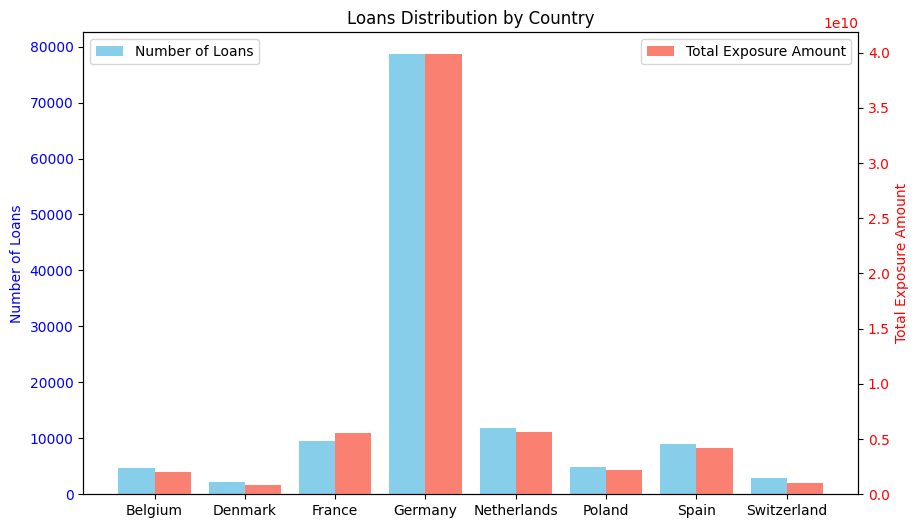

In [22]:
# aggregate data
agg_df = ds.groupby("CountryOfOrigination").agg(
    num_loans=("ExposureAmount", "count"),
    total_amount=("ExposureAmount", "sum")
).reset_index()

# figure
fig, ax1 = plt.subplots(figsize=(10,6))

# bar width
x = np.arange(len(agg_df["CountryOfOrigination"]))
width = 0.4

# plot number of loans 
ax1.bar(x - width/2, agg_df["num_loans"], width=width, color="skyblue", label="Number of Loans")
ax1.set_ylabel("Number of Loans", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xticks(x)
ax1.set_xticklabels(agg_df["CountryOfOrigination"])

# plot total loan amount
ax2 = ax1.twinx()
ax2.bar(x + width/2, agg_df["total_amount"], width=width, color="salmon", label="Total Exposure Amount")
ax2.set_ylabel("Total Exposure Amount", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# title, legends
plt.title("Loans Distribution by Country")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

## Modelling (logistic regression)

### pre-processing

In [294]:
# form the modelling dataset
our_dataset = ds[(ds["CountryOfOrigination"].isin(["Germany", "Netherlands"])) & (ds["ProductName"] == 'General mortgages')]

# drop empty columns 
our_dataset.drop(["Nr", 
                  "DateOfObservation",
                  "Loan_ID",
                  "Client_ID",
                  "CPI",
                  "DateOfLastDefaultFlag",
                  "Technical_field_1", 
                  "Technical_field_2",
                  "Technical_field_3",
                  "Technical_field_4" 
                  ], axis=1, inplace=True)
                  
print(our_dataset.columns)

Index(['DefaultFlag', 'PropertyType', 'PropertyValue', 'PropertySize',
       'ExposureLoanToValue', 'TotalCustomerLoanToValue',
       'CountryOfOrigination', 'City', 'NumberOfExposures', 'ProductName',
       'ExposureAmount', 'RemainingPaymentsRatio', 'TimeToMaturity',
       'MaturityRatio', 'InterestRate', 'MonthsOnBook',
       'ExposureDefaultFlagCount', 'ClientDefaultFlagCount', 'DelinquencyFlag',
       'DelinquencyLast3Mon', 'DelinquencyLast12Mon',
       '30PlusDelinquencyLast3Mon', '30PlusDelinquencyLast12Mon',
       '60PlusDelinquencyLast3Mon', '60PlusDelinquencyLast12Mon',
       '0_30DelinquencyLast3Mon', '0_30DelinquencyLast12Mon',
       '30_60DelinquencyLast3Mon', '30_60DelinquencyLast12Mon',
       '60_90DelinquencyLast3Mon', '60_90DelinquencyLast12Mon',
       'DaysInDelinquency'],
      dtype='object')


/var/folders/lw/lxw4ft892556gpxf0n3shwd40000gn/T/ipykernel_7514/2560498472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_dataset.drop(["Nr",


In [295]:
our_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74354 entries, 2 to 123680
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DefaultFlag                 74354 non-null  int64  
 1   PropertyType                74265 non-null  object 
 2   PropertyValue               74354 non-null  int64  
 3   PropertySize                74354 non-null  float64
 4   ExposureLoanToValue         74354 non-null  float64
 5   TotalCustomerLoanToValue    74354 non-null  float64
 6   CountryOfOrigination        74354 non-null  object 
 7   City                        74354 non-null  object 
 8   NumberOfExposures           74354 non-null  int64  
 9   ProductName                 74354 non-null  object 
 10  ExposureAmount              74354 non-null  int64  
 11  RemainingPaymentsRatio      74354 non-null  float64
 12  TimeToMaturity              74354 non-null  float64
 13  MaturityRatio               74354 n

In [296]:
# ENCODE CATEGORICAL VARIABLES

# column types
cat_cols = our_dataset.select_dtypes(include="object").columns.tolist()
num_cols = our_dataset.select_dtypes(exclude="object").columns.tolist()

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# fit transform
our_dataset_encoded = preprocessor.fit_transform(our_dataset)

# feature names
feature_names = preprocessor.get_feature_names_out()

# back to dataframe
our_dataset_encoded = pd.DataFrame(our_dataset_encoded, columns=feature_names)

In [297]:
print(feature_names)

['cat__PropertyType_Apartment block'
 'cat__PropertyType_Double-family house'
 'cat__PropertyType_Residential real estate'
 'cat__PropertyType_Single-family house' 'cat__PropertyType_Townhouse'
 'cat__PropertyType_Unknown' 'cat__PropertyType_nan'
 'cat__CountryOfOrigination_Netherlands' 'cat__City_Frankfurt'
 'num__DefaultFlag' 'num__PropertyValue' 'num__PropertySize'
 'num__ExposureLoanToValue' 'num__TotalCustomerLoanToValue'
 'num__NumberOfExposures' 'num__ExposureAmount'
 'num__RemainingPaymentsRatio' 'num__TimeToMaturity' 'num__MaturityRatio'
 'num__InterestRate' 'num__MonthsOnBook' 'num__ExposureDefaultFlagCount'
 'num__ClientDefaultFlagCount' 'num__DelinquencyFlag'
 'num__DelinquencyLast3Mon' 'num__DelinquencyLast12Mon'
 'num__30PlusDelinquencyLast3Mon' 'num__30PlusDelinquencyLast12Mon'
 'num__60PlusDelinquencyLast3Mon' 'num__60PlusDelinquencyLast12Mon'
 'num__0_30DelinquencyLast3Mon' 'num__0_30DelinquencyLast12Mon'
 'num__30_60DelinquencyLast3Mon' 'num__30_60DelinquencyLast12Mon

In [298]:
our_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74354 entries, 0 to 74353
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   cat__PropertyType_Apartment block          74354 non-null  float64
 1   cat__PropertyType_Double-family house      74354 non-null  float64
 2   cat__PropertyType_Residential real estate  74354 non-null  float64
 3   cat__PropertyType_Single-family house      74354 non-null  float64
 4   cat__PropertyType_Townhouse                74354 non-null  float64
 5   cat__PropertyType_Unknown                  74354 non-null  float64
 6   cat__PropertyType_nan                      74354 non-null  float64
 7   cat__CountryOfOrigination_Netherlands      74354 non-null  float64
 8   cat__City_Frankfurt                        74354 non-null  float64
 9   num__DefaultFlag                           74354 non-null  float64
 10  num__PropertyValue    

In [299]:
# move default indicator in 1st column
cols = list(our_dataset_encoded.columns)
cols = [cols[9]] + cols[:9] + cols[10:]
our_dataset_encoded = our_dataset_encoded[cols]
our_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74354 entries, 0 to 74353
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num__DefaultFlag                           74354 non-null  float64
 1   cat__PropertyType_Apartment block          74354 non-null  float64
 2   cat__PropertyType_Double-family house      74354 non-null  float64
 3   cat__PropertyType_Residential real estate  74354 non-null  float64
 4   cat__PropertyType_Single-family house      74354 non-null  float64
 5   cat__PropertyType_Townhouse                74354 non-null  float64
 6   cat__PropertyType_Unknown                  74354 non-null  float64
 7   cat__PropertyType_nan                      74354 non-null  float64
 8   cat__CountryOfOrigination_Netherlands      74354 non-null  float64
 9   cat__City_Frankfurt                        74354 non-null  float64
 10  num__PropertyValue    

In [300]:
# amputate: delete observations with NaNs
our_dataset_encoded_clean = our_dataset_encoded.dropna()
our_dataset_encoded_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74269 entries, 0 to 74353
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num__DefaultFlag                           74269 non-null  float64
 1   cat__PropertyType_Apartment block          74269 non-null  float64
 2   cat__PropertyType_Double-family house      74269 non-null  float64
 3   cat__PropertyType_Residential real estate  74269 non-null  float64
 4   cat__PropertyType_Single-family house      74269 non-null  float64
 5   cat__PropertyType_Townhouse                74269 non-null  float64
 6   cat__PropertyType_Unknown                  74269 non-null  float64
 7   cat__PropertyType_nan                      74269 non-null  float64
 8   cat__CountryOfOrigination_Netherlands      74269 non-null  float64
 9   cat__City_Frankfurt                        74269 non-null  float64
 10  num__PropertyValue         

In [301]:
# split train/test set
train_df, test_df = train_test_split(
    our_dataset_encoded_clean,
    test_size=0.3,
    random_state=2019
)

In [302]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51988 entries, 71518 to 40008
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num__DefaultFlag                           51988 non-null  float64
 1   cat__PropertyType_Apartment block          51988 non-null  float64
 2   cat__PropertyType_Double-family house      51988 non-null  float64
 3   cat__PropertyType_Residential real estate  51988 non-null  float64
 4   cat__PropertyType_Single-family house      51988 non-null  float64
 5   cat__PropertyType_Townhouse                51988 non-null  float64
 6   cat__PropertyType_Unknown                  51988 non-null  float64
 7   cat__PropertyType_nan                      51988 non-null  float64
 8   cat__CountryOfOrigination_Netherlands      51988 non-null  float64
 9   cat__City_Frankfurt                        51988 non-null  float64
 10  num__PropertyValue     

In [303]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22281 entries, 10568 to 4149
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   num__DefaultFlag                           22281 non-null  float64
 1   cat__PropertyType_Apartment block          22281 non-null  float64
 2   cat__PropertyType_Double-family house      22281 non-null  float64
 3   cat__PropertyType_Residential real estate  22281 non-null  float64
 4   cat__PropertyType_Single-family house      22281 non-null  float64
 5   cat__PropertyType_Townhouse                22281 non-null  float64
 6   cat__PropertyType_Unknown                  22281 non-null  float64
 7   cat__PropertyType_nan                      22281 non-null  float64
 8   cat__CountryOfOrigination_Netherlands      22281 non-null  float64
 9   cat__City_Frankfurt                        22281 non-null  float64
 10  num__PropertyValue      

In [304]:
# separate X Y
train_X = train_df.iloc[:, 1:]
train_Y = train_df.iloc[:, 0]
test_X = test_df.iloc[:, 1:]
test_Y = test_df.iloc[:, 0]

# make sure target is 0/1 integer
train_Y = train_Y.astype(int)
test_Y  = test_Y.astype(int)

### model using sklearn

#### model

In [310]:
# TRAINING
model = LogisticRegression(
    max_iter=10000,
    #class_weight="balanced",
    random_state=2019,
)
model.fit(train_X, train_Y)

# PREDICTIONS AND PROBABILITIES
pred_trai = model.predict(train_X)
prob_trai = model.predict_proba(train_X)[:, 1]
pred_test = model.predict(test_X)
prob_test = model.predict_proba(test_X)[:, 1]

# EVALUATION
#print('MODEL COEFFICIENTS')
#print(pd.Series(model.coef_[0], index=train_X.columns))
#print('MODEL INTERCEPT')
#print(model.intercept_)
print('CONFUSION MATRIX')
print(confusion_matrix(test_Y, pred_test))
print('REPORT')
print(classification_report(test_Y, pred_test))

# ROC/AUC
auc = roc_auc_score(train_Y, prob_trai)
accuracy_ratio = 2 * auc - 1
print("TRAIN AUC:", auc)
print("TRAIN Accuracy Ratio (AR):", accuracy_ratio)
auc = roc_auc_score(test_Y, prob_test)
accuracy_ratio = 2 * auc - 1
print("TEST AUC:", auc)
print("TEST Accuracy Ratio (AR):", accuracy_ratio)

CONFUSION MATRIX
[[21839    76]
 [  310    56]]
REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21915
           1       0.42      0.15      0.22       366

    accuracy                           0.98     22281
   macro avg       0.71      0.57      0.61     22281
weighted avg       0.98      0.98      0.98     22281

TRAIN AUC: 0.8190278763873935
TRAIN Accuracy Ratio (AR): 0.638055752774787
TEST AUC: 0.812134812969633
TEST Accuracy Ratio (AR): 0.6242696259392659


#### summary

In [ ]:
# EVALUATION SUMMARY
# MODEL COEFFICIENTS
#[[ 4.81308320e-04  5.77360686e-03  2.13745124e-04  1.96668541e-02
#  -1.14730391e-02  7.62969314e-03  5.52366739e-04 -3.30390502e-02
#  -5.95541109e-02 -4.28255519e-07 -7.10222389e-04 -2.55422322e-02
#  -3.52046013e-02 -5.56180416e-02 -1.56698397e-07 -4.34238205e-02
#  -6.24942305e-02 -4.36868141e-02 -2.37456317e-01 -9.85343202e-03
#   2.46527392e-01  2.49518789e-01  9.91790284e-03  4.04036342e-02
#  -1.83682352e-02  6.36419429e-02  8.90995182e-02  3.88258326e-02
#   9.89114862e-02  2.11583806e-02 -2.01373056e-03 -2.47961460e-02
#  -2.04944394e-01  4.87518151e-03 -6.08934802e-02  4.99316787e-02]]
# MODEL INTERCEPT
# [-0.09259977]
# CONFUSION MATRIX
# [[21839    76]
# [  310    56]]
# REPORT
#               precision    recall  f1-score   support
# 
#          0.0       0.99      1.00      0.99     21915
#          1.0       0.42      0.15      0.22       366
#
#     accuracy                           0.98     22281
#    macro avg       0.71      0.57      0.61     22281
# weighted avg       0.98      0.98      0.98     22281

### model using statsmodels

#### feature selection

In [315]:
# USE LASSO TO SCREEN VARIABLES

# fit lasso to select features
lasso = LogisticRegression(
    solver="saga",     # REQUIRED for l1_ratio
    l1_ratio=1.0,      # pure L1 → LASSO
    C=0.0009,
    max_iter=10000,
    random_state=2019
)
lasso.fit(train_X, train_Y)

# keep only non-zero coefficients
selected = np.where(lasso.coef_[0] != 0)[0]

# see which variables are kept
print(selected)


[ 9 10 13 14 16 18 19 23 24 26 28 32 35]


In [316]:
# re-write X
train_X = train_X.iloc[:, selected]
test_X  = test_X.iloc[:, selected]

In [317]:
# drop variables with high p-value
drop_variable=["num__PropertySize","num__DelinquencyLast12Mon","num__60PlusDelinquencyLast12Mon"]
train_X.drop(drop_variable, axis=1, inplace=True)
test_X.drop(drop_variable, axis=1, inplace=True)                  

/var/folders/lw/lxw4ft892556gpxf0n3shwd40000gn/T/ipykernel_7514/1848726687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X.drop(drop_variable, axis=1, inplace=True)


#### model

In [318]:
# add intercept (critical difference vs sklearn)
train_X_sm = sm.add_constant(train_X)
test_X_sm  = sm.add_constant(test_X)

# FIT
model2 = sm.Logit(train_Y, train_X_sm)
result = model2.fit()

# PREDICTIONS AND PROBABILITIES
prob_trai = result.predict(train_X_sm)
pred_trai = (prob_trai >= 0.5).astype(int)
prob_test = result.predict(test_X_sm)
pred_test = (prob_test >= 0.5).astype(int)

# SUMMARY
print(result.summary())
print("Log-Likelihood:", result.llf)
print("AIC:", result.aic)
print("BIC:", result.bic)

# EVALUATION
#print('MODEL COEFFICIENTS')
#print('-')
#print('MODEL INTERCEPT')
#print('-')
print('CONFUSION MATRIX')
print(confusion_matrix(test_Y, pred_test))
print('REPORT')
print(classification_report(test_Y, pred_test))

# ROC/AUC
auc = roc_auc_score(train_Y, prob_trai)
accuracy_ratio = 2 * auc - 1
print("TRAIN AUC:", auc)
print("TRAIN Accuracy Ratio (AR):", accuracy_ratio)
auc = roc_auc_score(test_Y, prob_test)
accuracy_ratio = 2 * auc - 1
print("TEST AUC:", auc)
print("TEST Accuracy Ratio (AR):", accuracy_ratio)

Optimization terminated successfully.
         Current function value: 0.063632
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       num__DefaultFlag   No. Observations:                51988
Model:                          Logit   Df Residuals:                    51977
Method:                           MLE   Df Model:                           10
Date:                Sat, 31 Jan 2026   Pseudo R-squ.:                  0.2731
Time:                        16:18:36   Log-Likelihood:                -3308.1
converged:                       True   LL-Null:                       -4551.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -4.6665      0.379    -12.321  

#### calibration

In [326]:
# RISK TABLE

import pandas as pd
import numpy as np
pd.set_option("display.width", 200)         # or a larger number
pd.set_option("display.max_columns", None)  # show all columns

# Define bins (same logic as histogram)
bins = np.linspace(0, 1, 21)

# Build evaluation dataframe
df_eval = pd.DataFrame({
    "probability": prob_sm,
    "default": test_Y
})

# Assign probability bins
df_eval["prob_bin"] = pd.cut(df_eval["probability"], bins=bins)

# Create combined table
table = (
    df_eval.groupby("prob_bin", observed=False)
    .agg(
        Count=("default", "count"),        # number of loans
        Defaults=("default", "sum"),       # number of defaults
        Sum_PD=("probability", "sum")      # Expected defaults        
    )
)

# Add derived metrics
table["Avg PD"] = table["Sum_PD"] / table["Count"] 
table["Default Rate"] = table["Defaults"] / table["Count"]
table["Share of Portfolio"] = table["Count"] / table["Count"].sum()

# Clean output
table = table.reset_index()

print(table)

       prob_bin  Count  Defaults      Sum_PD    Avg PD  Default Rate  Share of Portfolio
0   (0.0, 0.05]  21372       166  175.860443  0.008229      0.007767            0.959203
1   (0.05, 0.1]    282        39   20.210480  0.071668      0.138298            0.012657
2   (0.1, 0.15]    169        23   20.918279  0.123777      0.136095            0.007585
3   (0.15, 0.2]    103        24   17.596655  0.170841      0.233010            0.004623
4   (0.2, 0.25]     70        15   15.483295  0.221190      0.214286            0.003142
5   (0.25, 0.3]     59        19   16.308526  0.276416      0.322034            0.002648
6   (0.3, 0.35]     51        12   16.630820  0.326095      0.235294            0.002289
7   (0.35, 0.4]     46        13   17.239683  0.374776      0.282609            0.002065
8   (0.4, 0.45]     33        15   14.117858  0.427814      0.454545            0.001481
9   (0.45, 0.5]     15         6    7.137063  0.475804      0.400000            0.000673
10  (0.5, 0.55]     1

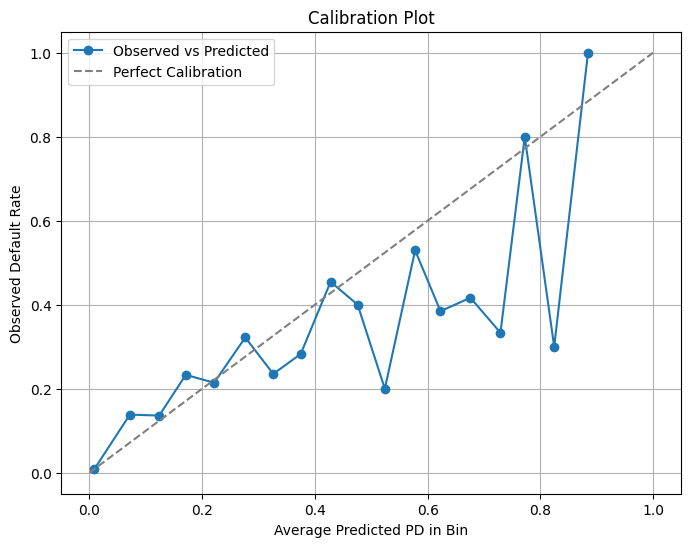

In [327]:
import matplotlib.pyplot as plt

# Use the table you created
# 'Avg PD' = average predicted PD per bin
# 'Default Rate' = actual observed default rate per bin
# 'prob_bin' = x-axis bins

plt.figure(figsize=(8, 6))

# Plot calibration line
plt.plot(table["Avg PD"], table["Default Rate"], marker='o', linestyle='-', label='Observed vs Predicted')

# Plot perfect calibration line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')

plt.xlabel("Average Predicted PD in Bin")
plt.ylabel("Observed Default Rate")
plt.title("Calibration Plot")
plt.legend()
plt.grid(True)
plt.show()


#### summary

In [ ]:
#Optimization terminated successfully.
#         Current function value: 0.063632
#         Iterations 9
#                           Logit Regression Results                           
#==============================================================================
#Dep. Variable:       num__DefaultFlag   No. Observations:                51988
#Model:                          Logit   Df Residuals:                    51977
#Method:                           MLE   Df Model:                           10
#Date:                Sun, 25 Jan 2026   Pseudo R-squ.:                  0.2731
#Time:                        15:26:15   Log-Likelihood:                -3308.1
#converged:                       True   LL-Null:                       -4551.0
#Covariance Type:            nonrobust   LLR p-value:                     0.000
#===================================================================================================
#                                      coef    std err          z      P>|z|      [0.025      0.975]
#---------------------------------------------------------------------------------------------------
#const                              -4.6665      0.379    -12.321      0.000      -5.409      -3.924
#num__PropertyValue              -7.868e-08   4.17e-08     -1.886      0.059    -1.6e-07    3.11e-09
#num__NumberOfExposures              0.0923      0.031      2.973      0.003       0.031       0.153
#num__ExposureAmount              2.092e-07   1.02e-07      2.053      0.040    9.48e-09    4.09e-07
#num__TimeToMaturity                 0.0110      0.005      2.069      0.039       0.001       0.021
#num__InterestRate                  -0.3678      0.124     -2.977      0.003      -0.610      -0.126
#num__MonthsOnBook                   0.0011      0.001      1.670      0.095      -0.000       0.002
#num__DelinquencyLast3Mon            0.3391      0.047      7.163      0.000       0.246       0.432
#num__30PlusDelinquencyLast12Mon     0.1836      0.016     11.763      0.000       0.153       0.214
#num__30_60DelinquencyLast12Mon     -0.2129      0.024     -8.765      0.000      -0.260      -0.165
#num__DaysInDelinquency              0.0437      0.002     20.299      0.000       0.039       0.048
#===================================================================================================
#Log-Likelihood: -3308.1141151507054
#AIC: 6638.228230301411
#BIC: 6735.674680520127
#MODEL COEFFICIENTS
#-
#MODEL INTERCEPT
#-
#CONFUSION MATRIX
#[[21868    47]
# [  332    34]]
#REPORT
#              precision    recall  f1-score   support

#           0       0.99      1.00      0.99     21915
#           1       0.42      0.09      0.15       366

#    accuracy                           0.98     22281
#   macro avg       0.70      0.55      0.57     22281
#weighted avg       0.98      0.98      0.98     22281
#
#AUC: 0.8411843324119893
#Accuracy Ratio (AR): 0.6823686648239786

## Exploring the dataset

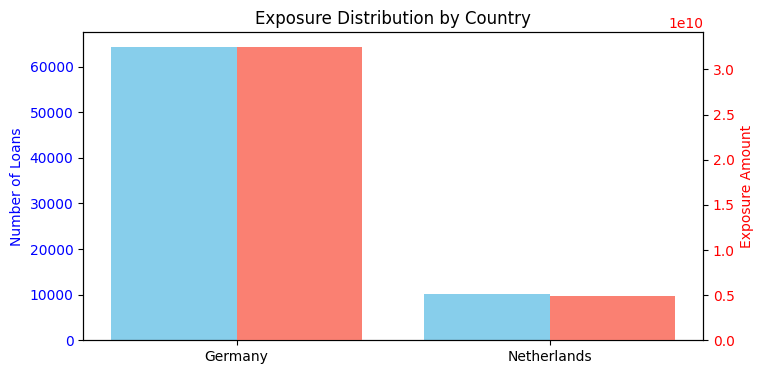

In [40]:
# aggregate data
agg_df = our_dataset.groupby("CountryOfOrigination").agg(
    num_loans=("ExposureAmount", "count"),
    total_amount=("ExposureAmount", "sum")
).reset_index()

# figure
fig, ax1 = plt.subplots(figsize=(8,4))

# bar width
x = np.arange(len(agg_df["CountryOfOrigination"]))
width = 0.4

# plot number of loans 
ax1.bar(x - width/2, agg_df["num_loans"], width=width, color="skyblue", label="Number of Loans")
ax1.set_ylabel("Number of Loans", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xticks(x)
ax1.set_xticklabels(agg_df["CountryOfOrigination"])

# plot total loan amount
ax2 = ax1.twinx()
ax2.bar(x + width/2, agg_df["total_amount"], width=width, color="salmon", label="Exposure Amount")
ax2.set_ylabel("Exposure Amount", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# title, legends
plt.title("Exposure Distribution by Country")

plt.show()

In [41]:
print(our_dataset["ExposureAmount"].sum()) 

37403832079


In [44]:
ds = our_dataset#[(our_dataset["DefaultFlag"] == 0)]
print(ds["ExposureAmount"].count()) 
print(ds["ExposureAmount"].sum()) 

74354
37403832079


In [46]:
ds = our_dataset[(our_dataset["ExposureLoanToValue"] > 0.8)]
print(ds["ExposureAmount"].count()) 
print(ds["ExposureAmount"].sum()) 

5301
7045882948


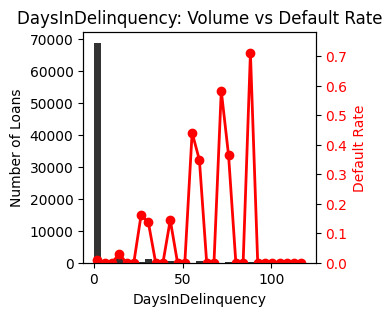

In [ ]:
# choose nominal variable
var_name = "DaysInDelinquency"
var_x = our_dataset[var_name].dropna()
defaults = our_dataset.loc[var_x.index, "DefaultFlag"]

# bins
max_val = our_dataset[var_name].max()
bins = np.linspace(0, max_val, 30)
bin_centers = (bins[:-1] + bins[1:]) / 2

# total loans per bin
total_counts, _ = np.histogram(var_x, bins=bins)

# defaults per bin
default_counts, _ = np.histogram(
    var_x[defaults == 1],
    bins=bins
)

# default rate (avoid division by zero)
default_rate = np.divide(
    default_counts,
    total_counts,
    out=np.zeros_like(default_counts, dtype=float),
    where=total_counts > 0
)

# figure
fig, ax1 = plt.subplots(figsize=(3, 3))

# histogram: number of loans
ax1.hist(
    var_x,
    bins=bins,
    color="black",
    alpha=0.8
)
ax1.set_xlabel(var_name)
ax1.set_ylabel("Number of Loans", color="black")
ax1.tick_params(axis="y", labelcolor="black")
#ax1.set_xlim(0, 2.0)

# second axis: default rate
ax2 = ax1.twinx()
ax2.plot(
    bin_centers,
    default_rate,
    color="red",
    linewidth=2,
    marker="o",
    label="Default Rate"
)
ax2.set_ylabel("Default Rate", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, default_rate.max() * 1.1)

# title
plt.title(f"{var_name}: Volume vs Default Rate")

plt.show()


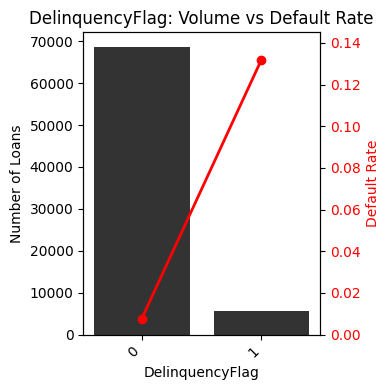

In [101]:
# choose categorical variable
cat_var = "DelinquencyFlag"

# aggregate
agg = (
    our_dataset
    .groupby(cat_var)
    .agg(
        num_loans=("DefaultFlag", "count"),
        num_defaults=("DefaultFlag", "sum")
    )
    .reset_index()
)

# default rate
agg["default_rate"] = agg["num_defaults"] / agg["num_loans"]

# sort by number of loans (optional but recommended)
agg = agg.sort_values("num_loans", ascending=False)

# x positions
x = np.arange(len(agg))

# figure
fig, ax1 = plt.subplots(figsize=(4, 4))

# bar plot: number of loans
ax1.bar(
    x,
    agg["num_loans"],
    color="black",
    alpha=0.8
)
ax1.set_xlabel(cat_var)
ax1.set_ylabel("Number of Loans", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_xticks(x)
ax1.set_xticklabels(agg[cat_var], rotation=45, ha="right")

# second axis: default rate
ax2 = ax1.twinx()
ax2.plot(
    x,
    agg["default_rate"],
    color="red",
    marker="o",
    linewidth=2
)
ax2.set_ylabel("Default Rate", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, agg["default_rate"].max() * 1.1)

# title
plt.title(f"{cat_var}: Volume vs Default Rate")

plt.tight_layout()
plt.show()

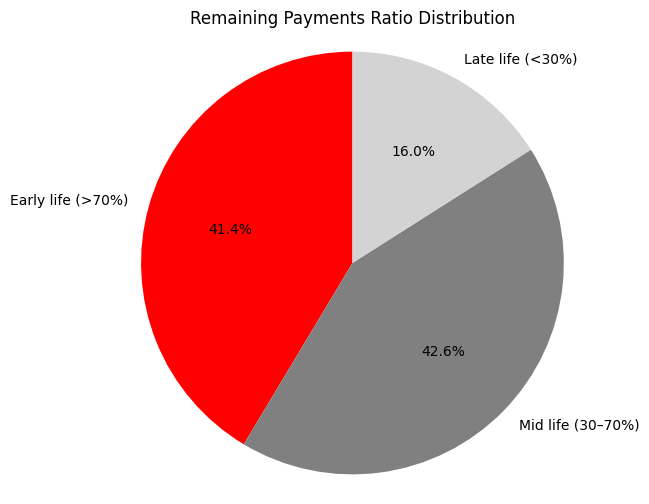

In [47]:
# Define categories
rpr = our_dataset["RemainingPaymentsRatio"].dropna()

early = (rpr > 0.7).sum()
mid   = ((rpr >= 0.3) & (rpr <= 0.7)).sum()
late  = (rpr < 0.3).sum()

sizes = [early, mid, late]
labels = ["Early life (>70%)", "Mid life (30–70%)", "Late life (<30%)"]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=["red", "gray", "lightgray"]
)
plt.title("Remaining Payments Ratio Distribution")
plt.axis("equal")  # makes it a circle

plt.show()